# =======================================
# NOTEBOOK 1 - EXPLORATION DES DONNÉES BRUTES
# =======================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

C:\Users\ivinh\AppData\Local\Temp\ipykernel_9684\3658487790.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Ajouter le dossier src au path
sys.path.append('../src')

# Style des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

%matplotlib inline
%load_ext autoreload
%autoreload 2

# =======================================
# 1. CHARGEMENT DES DONNÉES BRUTES
# =======================================

In [3]:
def load_raw_csv(year):
    """Charge un CSV brut sans transformation"""
    file_path = Path(f"../data/raw/{year}.csv")
    
    if not file_path.exists():
        print(f"❌ Fichier {file_path} introuvable")
        return None
    
    df = pd.read_csv(file_path)
    print(f"✅ {year}.csv chargé: {df.shape}")
    return df

# Charger les 3 années
df_2022 = load_raw_csv(2022)
df_2023 = load_raw_csv(2023)
df_2024 = load_raw_csv(2024)

✅ 2022.csv chargé: (372493, 7)
✅ 2023.csv chargé: (322466, 7)
✅ 2024.csv chargé: (372106, 7)


In [8]:
def load_raw_csv(year):
    """Charge un CSV brut sans transformation"""
    file_path = Path(f"../data/raw/{year}.csv")
    
    if not file_path.exists():
        print(f" Fichier {file_path} introuvable")
        return None
    
    # IMPORTANT: header=None car pas d'en-têtes dans les CSV
    df = pd.read_csv(file_path, header=None)
    
    # Nommer les colonnes manuellement (standard OHLC trading)
    df.columns = ['date', 'time', 'open', 'high', 'low', 'close', 'volume']
    
    print(f" {year}.csv chargé: {df.shape}")
    print(f"   Colonnes: {list(df.columns)}")
    
    return df

# Charger les 3 années
df_2022 = load_raw_csv(2022)
df_2023 = load_raw_csv(2023)
df_2024 = load_raw_csv(2024)

 2022.csv chargé: (372494, 7)
   Colonnes: ['date', 'time', 'open', 'high', 'low', 'close', 'volume']
 2023.csv chargé: (322467, 7)
   Colonnes: ['date', 'time', 'open', 'high', 'low', 'close', 'volume']
 2024.csv chargé: (372107, 7)
   Colonnes: ['date', 'time', 'open', 'high', 'low', 'close', 'volume']


# =======================================
# 2. INSPECTION DÉTAILLÉE
# =======================================

In [9]:
def inspect_dataframe(df, year):
    """Inspection détaillée d'un DataFrame"""
    
    print(f"\n{'='*60}")
    print(f"INSPECTION {year}")
    print(f"{'='*60}\n")
    
    # Shape
    print(f" Shape: {df.shape}")
    print(f"   {df.shape[0]:,} lignes × {df.shape[1]} colonnes\n")
    
    # Colonnes
    print(f" Colonnes:")
    print(f"   {list(df.columns)}\n")
    
    # Types
    print(f" Types de données:")
    print(df.dtypes)
    print()
    
    # Premières lignes
    print(f" Premières lignes:")
    display(df.head(10))
    
    # Dernières lignes
    print(f"\n Dernières lignes:")
    display(df.tail(10))
    
    # Statistiques descriptives
    print(f"\n Statistiques descriptives:")
    display(df.describe())
    
    # Valeurs manquantes
    print(f"\n Valeurs manquantes:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("    Aucune valeur manquante")
    else:
        print(missing[missing > 0])
    
    # Doublons (si colonne timestamp/date existe)
    if 'timestamp' in df.columns:
        duplicates = df['timestamp'].duplicated().sum()
        print(f"\n Doublons temporels: {duplicates}")
    elif 'date' in df.columns and 'time' in df.columns:
        df_temp = df.copy()
        df_temp['timestamp'] = pd.to_datetime(df_temp['date'].astype(str) + ' ' + df_temp['time'].astype(str))
        duplicates = df_temp['timestamp'].duplicated().sum()
        print(f"\n Doublons temporels: {duplicates}")

# Inspecter chaque année
for year, df in [(2022, df_2022), (2023, df_2023), (2024, df_2024)]:
    if df is not None:
        inspect_dataframe(df, year)


INSPECTION 2022

 Shape: (372494, 7)
   372,494 lignes × 7 colonnes

 Colonnes:
   ['date', 'time', 'open', 'high', 'low', 'close', 'volume']

 Types de données:
date       object
time       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

 Premières lignes:


,date,time,open,high,low,close,volume
0,2022.01.02,17:01,1.35199,1.35213,1.35199,1.35213,0
1,2022.01.02,17:02,1.35232,1.35232,1.35232,1.35232,0
2,2022.01.02,17:04,1.35233,1.35233,1.35233,1.35233,0
3,2022.01.02,17:06,1.35233,1.35233,1.35233,1.35233,0
4,2022.01.02,17:10,1.35233,1.35233,1.35233,1.35233,0
5,2022.01.02,17:11,1.35232,1.35232,1.35226,1.35227,0
6,2022.01.02,17:13,1.35223,1.35229,1.35223,1.35229,0
7,2022.01.02,17:14,1.35223,1.35223,1.35223,1.35223,0
8,2022.01.02,17:16,1.35231,1.35231,1.35231,1.35231,0
9,2022.01.02,17:17,1.35232,1.35232,1.35232,1.35232,0



 Dernières lignes:


,date,time,open,high,low,close,volume
372484,2022.12.30,16:49,1.20964,1.20972,1.20954,1.20959,0
372485,2022.12.30,16:50,1.20961,1.20971,1.20933,1.20941,0
372486,2022.12.30,16:51,1.20942,1.20963,1.20927,1.20940,0
372487,2022.12.30,16:52,1.20944,1.20951,1.20923,1.20937,0
372488,2022.12.30,16:53,1.20938,1.20957,1.20934,1.20936,0
372489,2022.12.30,16:54,1.20935,1.20956,1.20914,1.20924,0
372490,2022.12.30,16:55,1.20925,1.20944,1.20916,1.20918,0
372491,2022.12.30,16:56,1.20918,1.20952,1.20913,1.20930,0
372492,2022.12.30,16:57,1.20924,1.20954,1.20908,1.20931,0
372493,2022.12.30,16:58,1.20931,1.20974,1.20891,1.20963,0



 Statistiques descriptives:


,open,high,low,close,volume
count,372494.000000,372494.000000,372494.000000,372494.000000,372494.0
mean,1.236634,1.236773,1.236496,1.236633,0.0
std,0.076167,0.076128,0.076205,0.076167,0.0
min,1.036180,1.039240,1.032610,1.036190,0.0
25%,1.185020,1.185200,1.184840,1.185020,0.0
50%,1.222100,1.222240,1.221930,1.222090,0.0
75%,1.308110,1.308250,1.308000,1.308110,0.0
max,1.374810,1.374870,1.374710,1.374820,0.0



 Valeurs manquantes:
    Aucune valeur manquante

 Doublons temporels: 60

INSPECTION 2023

 Shape: (322467, 7)
   322,467 lignes × 7 colonnes

 Colonnes:
   ['date', 'time', 'open', 'high', 'low', 'close', 'volume']

 Types de données:
date       object
time       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

 Premières lignes:


,date,time,open,high,low,close,volume
0,2023.01.01,18:04,1.20615,1.20615,1.20613,1.20613,0
1,2023.01.01,18:05,1.20494,1.20615,1.20494,1.20590,0
2,2023.01.01,18:06,1.20497,1.20497,1.20497,1.20497,0
3,2023.01.01,18:07,1.20668,1.20668,1.20664,1.20664,0
4,2023.01.01,18:08,1.20564,1.20664,1.20564,1.20664,0
5,2023.01.01,18:18,1.20566,1.20644,1.20563,1.20643,0
6,2023.01.01,18:19,1.20691,1.20836,1.20690,1.20817,0
7,2023.01.01,18:20,1.20816,1.20816,1.20749,1.20792,0
8,2023.01.01,18:21,1.20808,1.20809,1.20791,1.20791,0
9,2023.01.01,18:22,1.20809,1.20809,1.20791,1.20808,0



 Dernières lignes:


,date,time,open,high,low,close,volume
322457,2023.12.29,16:49,1.27367,1.27372,1.27361,1.27367,0
322458,2023.12.29,16:50,1.27367,1.27368,1.27346,1.27347,0
322459,2023.12.29,16:51,1.27347,1.27351,1.27346,1.27349,0
322460,2023.12.29,16:52,1.27348,1.27350,1.27338,1.27350,0
322461,2023.12.29,16:53,1.27349,1.27350,1.27338,1.27342,0
322462,2023.12.29,16:54,1.27343,1.27349,1.27338,1.27338,0
322463,2023.12.29,16:55,1.27337,1.27341,1.27309,1.27311,0
322464,2023.12.29,16:56,1.27309,1.27311,1.27287,1.27300,0
322465,2023.12.29,16:57,1.27303,1.27307,1.27299,1.27300,0
322466,2023.12.29,16:58,1.27300,1.27309,1.27295,1.27305,0



 Statistiques descriptives:


,open,high,low,close,volume
count,322467.000000,322467.000000,322467.000000,322467.000000,322467.0
mean,1.242947,1.243047,1.242845,1.242946,0.0
std,0.026201,0.026191,0.026210,0.026200,0.0
min,1.180610,1.181040,1.180240,1.180590,0.0
25%,1.220070,1.220170,1.219990,1.220080,0.0
50%,1.242850,1.242940,1.242760,1.242850,0.0
75%,1.264230,1.264330,1.264120,1.264230,0.0
max,1.314040,1.314210,1.313950,1.314030,0.0



 Valeurs manquantes:
    Aucune valeur manquante

 Doublons temporels: 60

INSPECTION 2024

 Shape: (372107, 7)
   372,107 lignes × 7 colonnes

 Colonnes:
   ['date', 'time', 'open', 'high', 'low', 'close', 'volume']

 Types de données:
date       object
time       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

 Premières lignes:


,date,time,open,high,low,close,volume
0,2024.01.01,17:00,1.27184,1.27184,1.27184,1.27184,0
1,2024.01.01,17:04,1.27155,1.27208,1.27155,1.27208,0
2,2024.01.01,17:05,1.27207,1.27211,1.27207,1.27211,0
3,2024.01.01,17:06,1.27210,1.27210,1.27210,1.27210,0
4,2024.01.01,17:07,1.27210,1.27210,1.27210,1.27210,0
5,2024.01.01,17:08,1.27210,1.27210,1.27210,1.27210,0
6,2024.01.01,17:09,1.27210,1.27210,1.27210,1.27210,0
7,2024.01.01,17:10,1.27210,1.27210,1.27210,1.27210,0
8,2024.01.01,17:12,1.27210,1.27225,1.27210,1.27225,0
9,2024.01.01,17:13,1.27225,1.27225,1.27225,1.27225,0



 Dernières lignes:


,date,time,open,high,low,close,volume
372097,2024.12.31,16:49,1.25156,1.25159,1.25142,1.25142,0
372098,2024.12.31,16:50,1.25140,1.25142,1.25136,1.25139,0
372099,2024.12.31,16:51,1.25140,1.25144,1.25136,1.25138,0
372100,2024.12.31,16:52,1.25139,1.25140,1.25137,1.25138,0
372101,2024.12.31,16:53,1.25137,1.25142,1.25137,1.25139,0
372102,2024.12.31,16:54,1.25140,1.25141,1.25135,1.25138,0
372103,2024.12.31,16:55,1.25136,1.25140,1.25135,1.25136,0
372104,2024.12.31,16:56,1.25136,1.25136,1.25115,1.25119,0
372105,2024.12.31,16:57,1.25116,1.25126,1.25115,1.25125,0
372106,2024.12.31,16:58,1.25126,1.25126,1.25108,1.25116,0



 Statistiques descriptives:


,open,high,low,close,volume
count,372107.000000,372107.000000,372107.000000,372107.000000,372107.0
mean,1.278128,1.278204,1.278049,1.278127,0.0
std,0.021738,0.021741,0.021736,0.021738,0.0
min,1.230000,1.230050,1.229910,1.229980,0.0
25%,1.263710,1.263780,1.263640,1.263710,0.0
50%,1.272020,1.272100,1.271950,1.272020,0.0
75%,1.291530,1.291610,1.291460,1.291530,0.0
max,1.343280,1.343410,1.343140,1.343230,0.0



 Valeurs manquantes:
    Aucune valeur manquante

 Doublons temporels: 60


# =======================================
# 3. DÉTECTION AUTOMATIQUE DES PROBLÈMES
# =======================================

In [10]:
def detect_all_issues(df, year):
    """Détecte tous les problèmes dans les données"""
    
    print(f"\n{'='*60}")
    print(f"DÉTECTION DES PROBLÈMES - {year}")
    print(f"{'='*60}\n")
    
    issues_found = []
    
    # Créer timestamp si nécessaire
    if 'timestamp' not in df.columns:
        if 'date' in df.columns and 'time' in df.columns:
            df['timestamp'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))
        else:
            print("  Impossible de créer un timestamp (colonnes date/time manquantes)")
            return issues_found
    
    # 1. Valeurs manquantes
    missing = df.isnull().sum()
    if missing.sum() > 0:
        issue = {
            'type': 'Valeurs manquantes',
            'severity': 'HIGH',
            'count': int(missing.sum()),
            'details': {col: int(count) for col, count in missing[missing > 0].items()}
        }
        issues_found.append(issue)
        print(f"  VALEURS MANQUANTES: {issue['count']} au total")
        for col, count in issue['details'].items():
            pct = (count / len(df)) * 100
            print(f"   - {col}: {count} ({pct:.2f}%)")
    
    # 2. Doublons temporels
    duplicates = df['timestamp'].duplicated()
    if duplicates.sum() > 0:
        issue = {
            'type': 'Doublons temporels',
            'severity': 'HIGH',
            'count': int(duplicates.sum()),
            'indices': df[duplicates].index.tolist()[:10]
        }
        issues_found.append(issue)
        print(f"\n  DOUBLONS TEMPORELS: {issue['count']}")
        print(f"   Exemples d'indices: {issue['indices'][:5]}")
        print(f"   Exemples de timestamps:")
        display(df[duplicates][['timestamp']].head())
    
    # 3. Prix négatifs ou nuls
    price_cols = ['open', 'high', 'low', 'close']
    for col in price_cols:
        if col in df.columns:
            neg_or_zero = (df[col] <= 0).sum()
            if neg_or_zero > 0:
                issue = {
                    'type': f'Prix négatifs/nuls ({col})',
                    'severity': 'CRITICAL',
                    'count': int(neg_or_zero),
                    'indices': df[df[col] <= 0].index.tolist()[:10]
                }
                issues_found.append(issue)
                print(f"\n PRIX NÉGATIFS/NULS dans {col}: {issue['count']}")
                print(f"   Valeurs:")
                display(df[df[col] <= 0][[col, 'timestamp']].head())
    
    # 4. Incohérences OHLC
    if all(col in df.columns for col in ['open', 'high', 'low', 'close']):
        
        # High < Low
        high_low_error = df[df['high'] < df['low']]
        if len(high_low_error) > 0:
            issue = {
                'type': 'High < Low',
                'severity': 'CRITICAL',
                'count': len(high_low_error),
                'indices': high_low_error.index.tolist()[:10]
            }
            issues_found.append(issue)
            print(f"\n HIGH < LOW: {issue['count']} lignes")
            display(high_low_error[['timestamp', 'open', 'high', 'low', 'close']].head())
        
        # Close hors [Low, High]
        close_out = df[(df['close'] < df['low']) | (df['close'] > df['high'])]
        if len(close_out) > 0:
            issue = {
                'type': 'Close hors bornes [Low, High]',
                'severity': 'HIGH',
                'count': len(close_out),
                'indices': close_out.index.tolist()[:10]
            }
            issues_found.append(issue)
            print(f"\n  CLOSE HORS BORNES: {issue['count']} lignes")
            display(close_out[['timestamp', 'open', 'high', 'low', 'close']].head())
        
        # Open hors [Low, High]
        open_out = df[(df['open'] < df['low']) | (df['open'] > df['high'])]
        if len(open_out) > 0:
            issue = {
                'type': 'Open hors bornes [Low, High]',
                'severity': 'MEDIUM',
                'count': len(open_out),
                'indices': open_out.index.tolist()[:10]
            }
            issues_found.append(issue)
            print(f"\n  OPEN HORS BORNES: {issue['count']} lignes")
    
    # 5. Gaps temporels (> 1 minute)
    if 'timestamp' in df.columns:
        df_sorted = df.sort_values('timestamp').reset_index(drop=True)
        time_diffs = df_sorted['timestamp'].diff()
        
        gaps = time_diffs[time_diffs > pd.Timedelta(minutes=1)]
        
        if len(gaps) > 0:
            issue = {
                'type': 'Gaps temporels',
                'severity': 'MEDIUM',
                'count': len(gaps),
                'max_gap': str(gaps.max()),
                'mean_gap': str(gaps.mean()),
                'indices': gaps.index.tolist()[:10]
            }
            issues_found.append(issue)
            print(f"\n  GAPS TEMPORELS (> 1 min): {issue['count']}")
            print(f"   Gap maximum: {issue['max_gap']}")
            print(f"   Gap moyen: {issue['mean_gap']}")
            
            # Afficher les 5 plus gros gaps
            top_gaps = time_diffs.nlargest(5)
            print(f"\n   Top 5 gaps:")
            for idx, gap in top_gaps.items():
                if idx > 0:  # Skip first (NaT)
                    print(f"   - Index {idx}: {gap} ({df_sorted.loc[idx-1, 'timestamp']} → {df_sorted.loc[idx, 'timestamp']})")
    
    # 6. Anomalies statistiques (outliers extrêmes)
    if 'close' in df.columns:
        Q1 = df['close'].quantile(0.25)
        Q3 = df['close'].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        
        outliers = df[(df['close'] < lower_bound) | (df['close'] > upper_bound)]
        
        if len(outliers) > 0:
            issue = {
                'type': 'Outliers extrêmes (±3 IQR)',
                'severity': 'LOW',
                'count': len(outliers),
                'bounds': {'lower': float(lower_bound), 'upper': float(upper_bound)},
                'indices': outliers.index.tolist()[:10]
            }
            issues_found.append(issue)
            print(f"\n  OUTLIERS EXTRÊMES: {issue['count']}")
            print(f"   Bornes: [{lower_bound:.5f}, {upper_bound:.5f}]")
    
    # Résumé
    print(f"\n{'='*60}")
    if not issues_found:
        print(" AUCUN PROBLÈME DÉTECTÉ")
    else:
        print(f" RÉSUMÉ: {len(issues_found)} types de problèmes détectés")
        for issue in issues_found:
            severity_emoji = {'CRITICAL': '🚨', 'HIGH': '⚠️', 'MEDIUM': '⚡', 'LOW': 'ℹ️'}
            print(f"   {severity_emoji.get(issue['severity'], '•')} {issue['type']}: {issue['count']}")
    print(f"{'='*60}\n")
    
    return issues_found

# Détecter pour chaque année
all_issues = {}
for year, df in [(2022, df_2022), (2023, df_2023), (2024, df_2024)]:
    if df is not None:
        issues = detect_all_issues(df.copy(), year)
        all_issues[year] = issues


DÉTECTION DES PROBLÈMES - 2022


  DOUBLONS TEMPORELS: 60
   Exemples d'indices: [308313, 308314, 308315, 308316, 308317]
   Exemples de timestamps:


,timestamp
308313,2022-10-30 19:00:00
308314,2022-10-30 19:01:00
308315,2022-10-30 19:02:00
308316,2022-10-30 19:03:00
308317,2022-10-30 19:04:00



  GAPS TEMPORELS (> 1 min): 1109
   Gap maximum: 2 days 01:02:00
   Gap moyen: 0 days 02:15:12.876465284

   Top 5 gaps:
   - Index 85964: 2 days 01:02:00 (2022-03-25 15:59:00 → 2022-03-27 17:01:00)
   - Index 315318: 2 days 01:01:00 (2022-11-04 15:59:00 → 2022-11-06 17:00:00)
   - Index 229274: 2 days 00:26:00 (2022-08-12 16:59:00 → 2022-08-14 17:25:00)
   - Index 286582: 2 days 00:14:00 (2022-10-07 16:59:00 → 2022-10-09 17:13:00)
   - Index 78812: 2 days 00:11:00 (2022-03-18 15:59:00 → 2022-03-20 16:10:00)

 RÉSUMÉ: 2 types de problèmes détectés
   ⚠️ Doublons temporels: 60
   ⚡ Gaps temporels: 1109


DÉTECTION DES PROBLÈMES - 2023


  DOUBLONS TEMPORELS: 60
   Exemples d'indices: [259212, 259213, 259214, 259215, 259216]
   Exemples de timestamps:


,timestamp
259212,2023-10-29 19:00:00
259213,2023-10-29 19:01:00
259214,2023-10-29 19:02:00
259215,2023-10-29 19:03:00
259216,2023-10-29 19:04:00



  GAPS TEMPORELS (> 1 min): 1407
   Gap maximum: 2 days 22:01:00
   Gap moyen: 0 days 02:22:17.953091684

   Top 5 gaps:
   - Index 84684: 2 days 22:01:00 (2023-04-06 19:59:00 → 2023-04-09 18:00:00)
   - Index 120267: 2 days 03:01:00 (2023-05-26 15:59:00 → 2023-05-28 19:00:00)
   - Index 145523: 2 days 03:01:00 (2023-06-30 14:59:00 → 2023-07-02 18:00:00)
   - Index 150607: 2 days 03:01:00 (2023-07-07 14:59:00 → 2023-07-09 18:00:00)
   - Index 155572: 2 days 03:01:00 (2023-07-14 15:59:00 → 2023-07-16 19:00:00)

 RÉSUMÉ: 2 types de problèmes détectés
   ⚠️ Doublons temporels: 60
   ⚡ Gaps temporels: 1407


DÉTECTION DES PROBLÈMES - 2024


  DOUBLONS TEMPORELS: 60
   Exemples d'indices: [306338, 306339, 306340, 306341, 306342]
   Exemples de timestamps:


,timestamp
306338,2024-10-27 19:00:00
306339,2024-10-27 19:01:00
306340,2024-10-27 19:02:00
306341,2024-10-27 19:03:00
306342,2024-10-27 19:04:00



  GAPS TEMPORELS (> 1 min): 1666
   Gap maximum: 2 days 01:05:00
   Gap moyen: 0 days 01:33:10.084033613

   Top 5 gaps:
   - Index 91728: 2 days 01:05:00 (2024-03-29 15:59:00 → 2024-03-31 17:04:00)
   - Index 313283: 2 days 01:01:00 (2024-11-01 15:59:00 → 2024-11-03 17:00:00)
   - Index 120347: 2 days 00:06:00 (2024-04-26 16:59:00 → 2024-04-28 17:05:00)
   - Index 5739: 2 days 00:05:00 (2024-01-05 16:59:00 → 2024-01-07 17:04:00)
   - Index 20028: 2 days 00:05:00 (2024-01-19 16:59:00 → 2024-01-21 17:04:00)

 RÉSUMÉ: 2 types de problèmes détectés
   ⚠️ Doublons temporels: 60
   ⚡ Gaps temporels: 1666



# ============================================================
# 4 VISUALISATIONS FINALES - VUE D'ENSEMBLE
# ============================================================

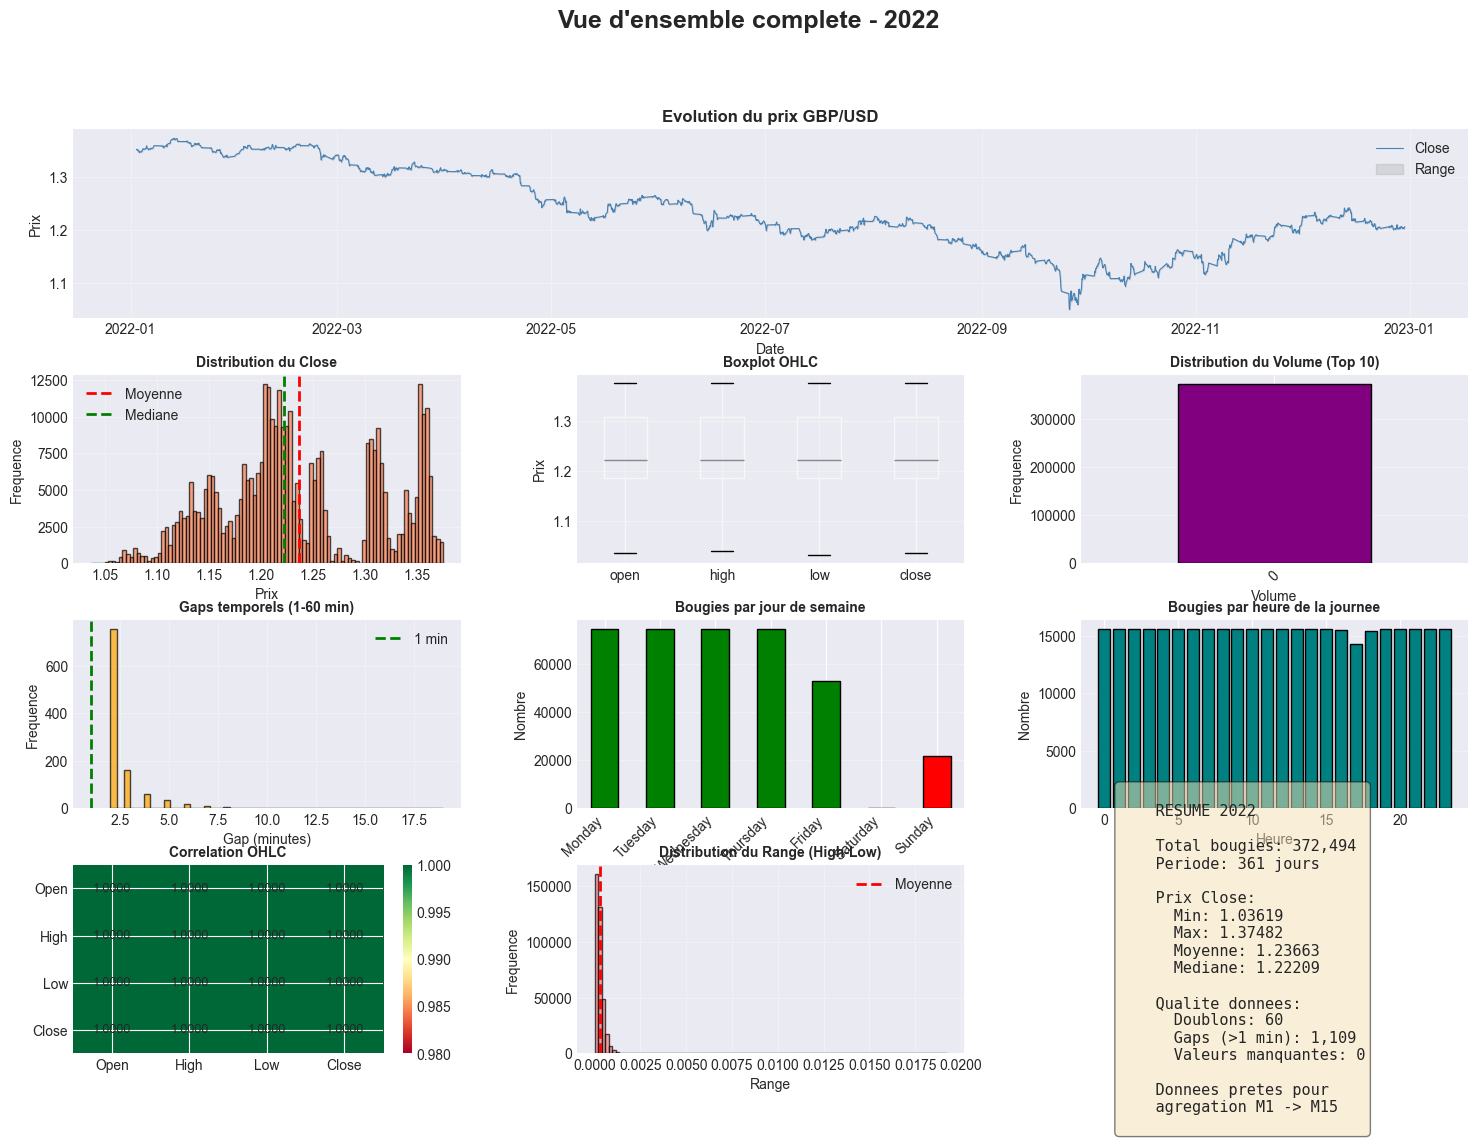

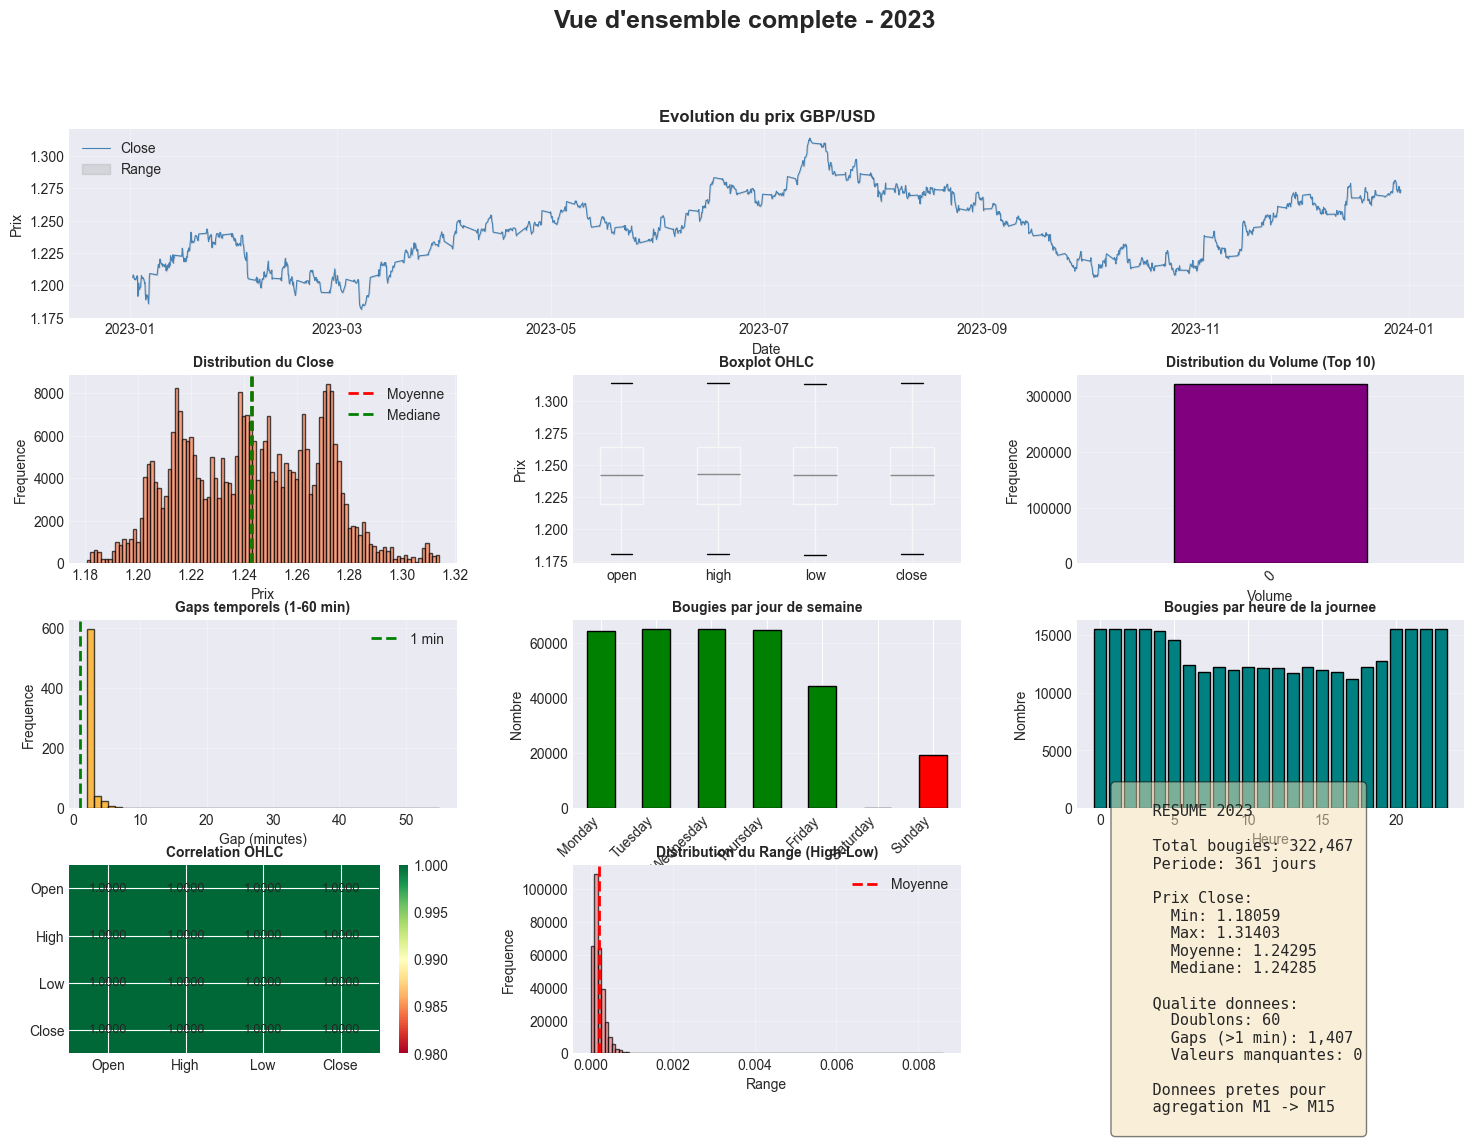

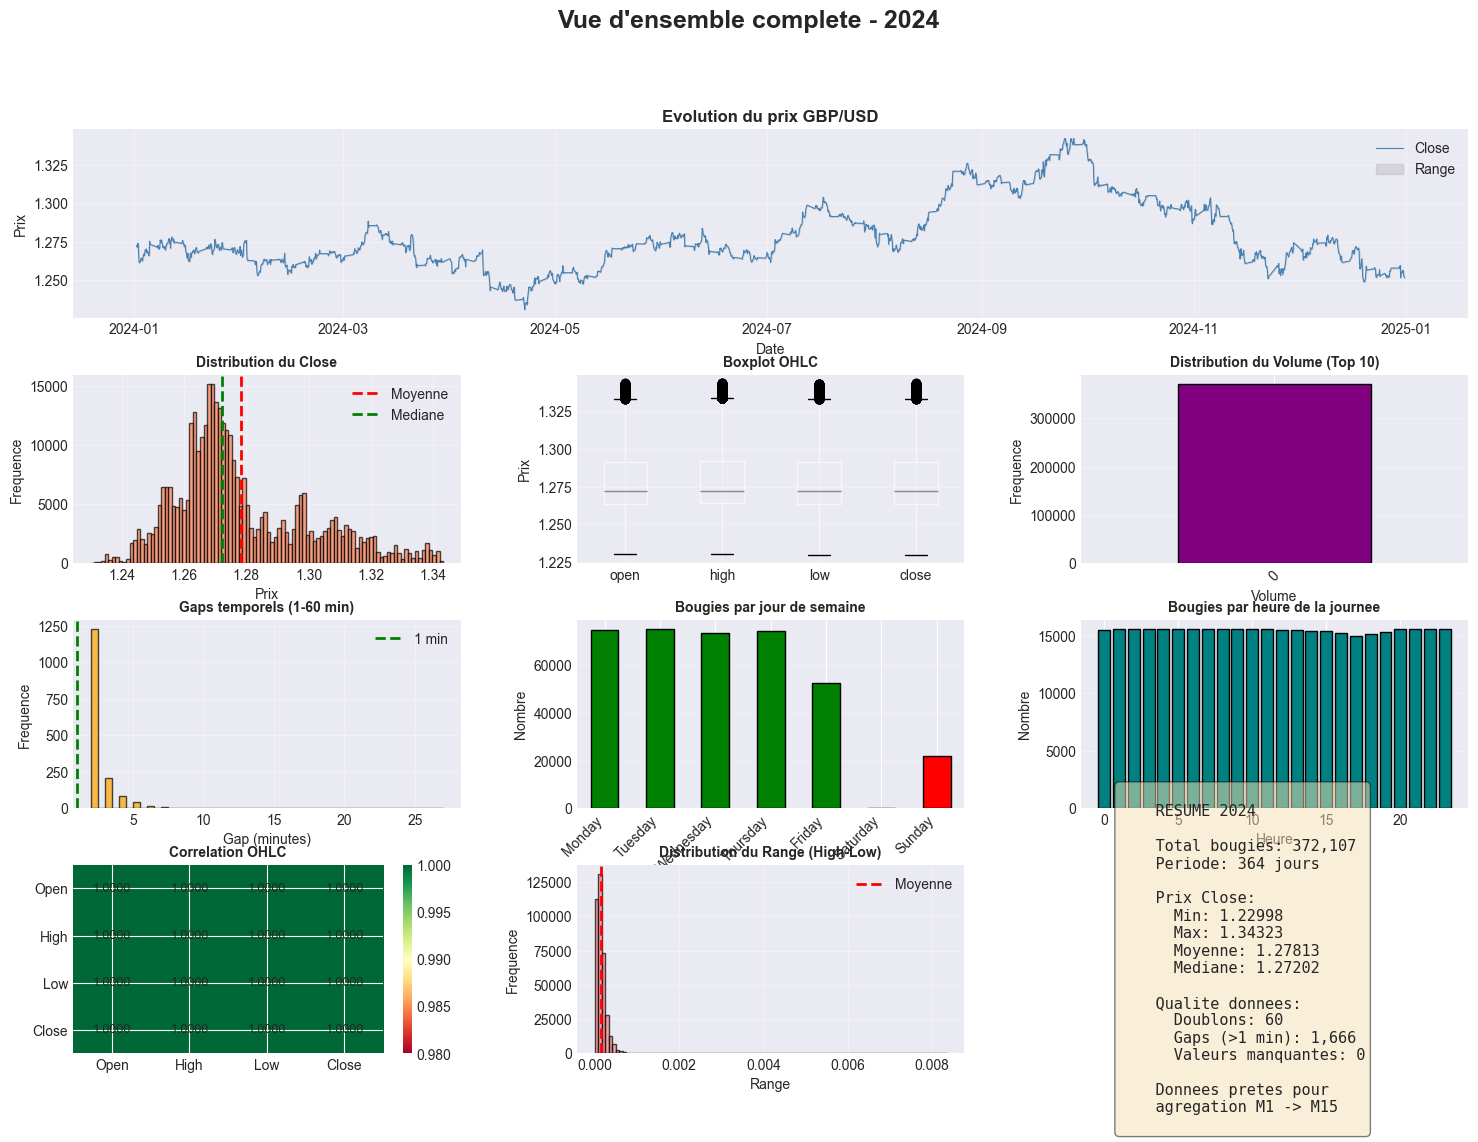

In [12]:
def create_complete_overview(df, year):
    """Vue d'ensemble complete des donnees brutes"""
    
    # S'assurer que timestamp existe
    if 'timestamp' not in df.columns:
        df = df.copy()
        df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'])
    
    df_sorted = df.sort_values('timestamp').reset_index(drop=True)
    
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)
    fig.suptitle(f'Vue d\'ensemble complete - {year}', fontsize=18, fontweight='bold')
    
    # 1. Prix OHLC dans le temps
    ax1 = fig.add_subplot(gs[0, :])
    sample = df_sorted.iloc[::max(1, len(df_sorted)//2000)]
    ax1.plot(sample['timestamp'], sample['close'], linewidth=0.8, color='steelblue', label='Close')
    ax1.fill_between(sample['timestamp'], sample['low'], sample['high'], alpha=0.2, color='gray', label='Range')
    ax1.set_title('Evolution du prix GBP/USD', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Prix')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Distribution du Close
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.hist(df['close'], bins=100, edgecolor='black', alpha=0.7, color='coral')
    ax2.axvline(df['close'].mean(), color='red', linestyle='--', label='Moyenne', linewidth=2)
    ax2.axvline(df['close'].median(), color='green', linestyle='--', label='Mediane', linewidth=2)
    ax2.set_title('Distribution du Close', fontweight='bold', fontsize=10)
    ax2.set_xlabel('Prix')
    ax2.set_ylabel('Frequence')
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    # 3. Boxplot OHLC
    ax3 = fig.add_subplot(gs[1, 1])
    df[['open', 'high', 'low', 'close']].boxplot(ax=ax3)
    ax3.set_title('Boxplot OHLC', fontweight='bold', fontsize=10)
    ax3.set_ylabel('Prix')
    ax3.grid(alpha=0.3)
    
    # 4. Volume distribution
    ax4 = fig.add_subplot(gs[1, 2])
    volume_counts = df['volume'].value_counts().head(10)
    volume_counts.plot(kind='bar', ax=ax4, color='purple', edgecolor='black')
    ax4.set_title('Distribution du Volume (Top 10)', fontweight='bold', fontsize=10)
    ax4.set_xlabel('Volume')
    ax4.set_ylabel('Frequence')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(axis='y', alpha=0.3)
    
    # 5. Gaps temporels
    ax5 = fig.add_subplot(gs[2, 0])
    time_diffs = df_sorted['timestamp'].diff()
    time_diffs_minutes = time_diffs.dt.total_seconds() / 60
    gaps = time_diffs_minutes[time_diffs_minutes > 1]
    gaps_filtered = gaps[gaps <= 60]
    if len(gaps_filtered) > 0:
        ax5.hist(gaps_filtered, bins=50, edgecolor='black', alpha=0.7, color='orange')
        ax5.axvline(1, color='green', linestyle='--', label='1 min', linewidth=2)
        ax5.set_title('Gaps temporels (1-60 min)', fontweight='bold', fontsize=10)
        ax5.set_xlabel('Gap (minutes)')
        ax5.set_ylabel('Frequence')
        ax5.legend()
        ax5.grid(alpha=0.3)
    
    # 6. Nombre de bougies par jour de semaine
    ax6 = fig.add_subplot(gs[2, 1])
    df_sorted['day_of_week'] = df_sorted['timestamp'].dt.day_name()
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df_sorted['day_of_week'].value_counts().reindex(day_order, fill_value=0)
    colors = ['green' if d in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'red' for d in day_order]
    day_counts.plot(kind='bar', ax=ax6, color=colors, edgecolor='black')
    ax6.set_title('Bougies par jour de semaine', fontweight='bold', fontsize=10)
    ax6.set_xlabel('Jour')
    ax6.set_ylabel('Nombre')
    ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')
    ax6.grid(axis='y', alpha=0.3)
    
    # 7. Nombre de bougies par heure
    ax7 = fig.add_subplot(gs[2, 2])
    df_sorted['hour'] = df_sorted['timestamp'].dt.hour
    hour_counts = df_sorted['hour'].value_counts().sort_index()
    ax7.bar(hour_counts.index, hour_counts.values, color='teal', edgecolor='black')
    ax7.set_title('Bougies par heure de la journee', fontweight='bold', fontsize=10)
    ax7.set_xlabel('Heure')
    ax7.set_ylabel('Nombre')
    ax7.grid(axis='y', alpha=0.3)
    
    # 8. Correlation OHLC
    ax8 = fig.add_subplot(gs[3, 0])
    corr = df[['open', 'high', 'low', 'close']].corr()
    im = ax8.imshow(corr, cmap='RdYlGn', aspect='auto', vmin=0.98, vmax=1.0)
    ax8.set_xticks(range(4))
    ax8.set_yticks(range(4))
    ax8.set_xticklabels(['Open', 'High', 'Low', 'Close'])
    ax8.set_yticklabels(['Open', 'High', 'Low', 'Close'])
    for i in range(4):
        for j in range(4):
            ax8.text(j, i, f'{corr.iloc[i, j]:.4f}', ha="center", va="center", fontsize=9)
    ax8.set_title('Correlation OHLC', fontweight='bold', fontsize=10)
    plt.colorbar(im, ax=ax8)
    
    # 9. Range des bougies (High - Low)
    ax9 = fig.add_subplot(gs[3, 1])
    df_sorted['range'] = df_sorted['high'] - df_sorted['low']
    ax9.hist(df_sorted['range'], bins=100, edgecolor='black', alpha=0.7, color='lightcoral')
    ax9.axvline(df_sorted['range'].mean(), color='red', linestyle='--', label='Moyenne', linewidth=2)
    ax9.set_title('Distribution du Range (High-Low)', fontweight='bold', fontsize=10)
    ax9.set_xlabel('Range')
    ax9.set_ylabel('Frequence')
    ax9.legend()
    ax9.grid(alpha=0.3)
    
    # 10. Resume textuel
    ax10 = fig.add_subplot(gs[3, 2])
    ax10.axis('off')
    
    # Calculer stats
    n_rows = len(df)
    n_days = (df_sorted['timestamp'].max() - df_sorted['timestamp'].min()).days
    n_duplicates = df_sorted['timestamp'].duplicated().sum()
    n_gaps = (time_diffs_minutes > 1).sum()
    
    summary_text = f"""
    RESUME {year}
    
    Total bougies: {n_rows:,}
    Periode: {n_days} jours
    
    Prix Close:
      Min: {df['close'].min():.5f}
      Max: {df['close'].max():.5f}
      Moyenne: {df['close'].mean():.5f}
      Mediane: {df['close'].median():.5f}
    
    Qualite donnees:
      Doublons: {n_duplicates}
      Gaps (>1 min): {n_gaps:,}
      Valeurs manquantes: {df.isnull().sum().sum()}
    
    Donnees pretes pour
    agregation M1 -> M15
    """
    
    ax10.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
              family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.show()

# Creer la vue d'ensemble pour chaque annee
for year, df in [(2022, df_2022), (2023, df_2023), (2024, df_2024)]:
    if df is not None:
        create_complete_overview(df, year)

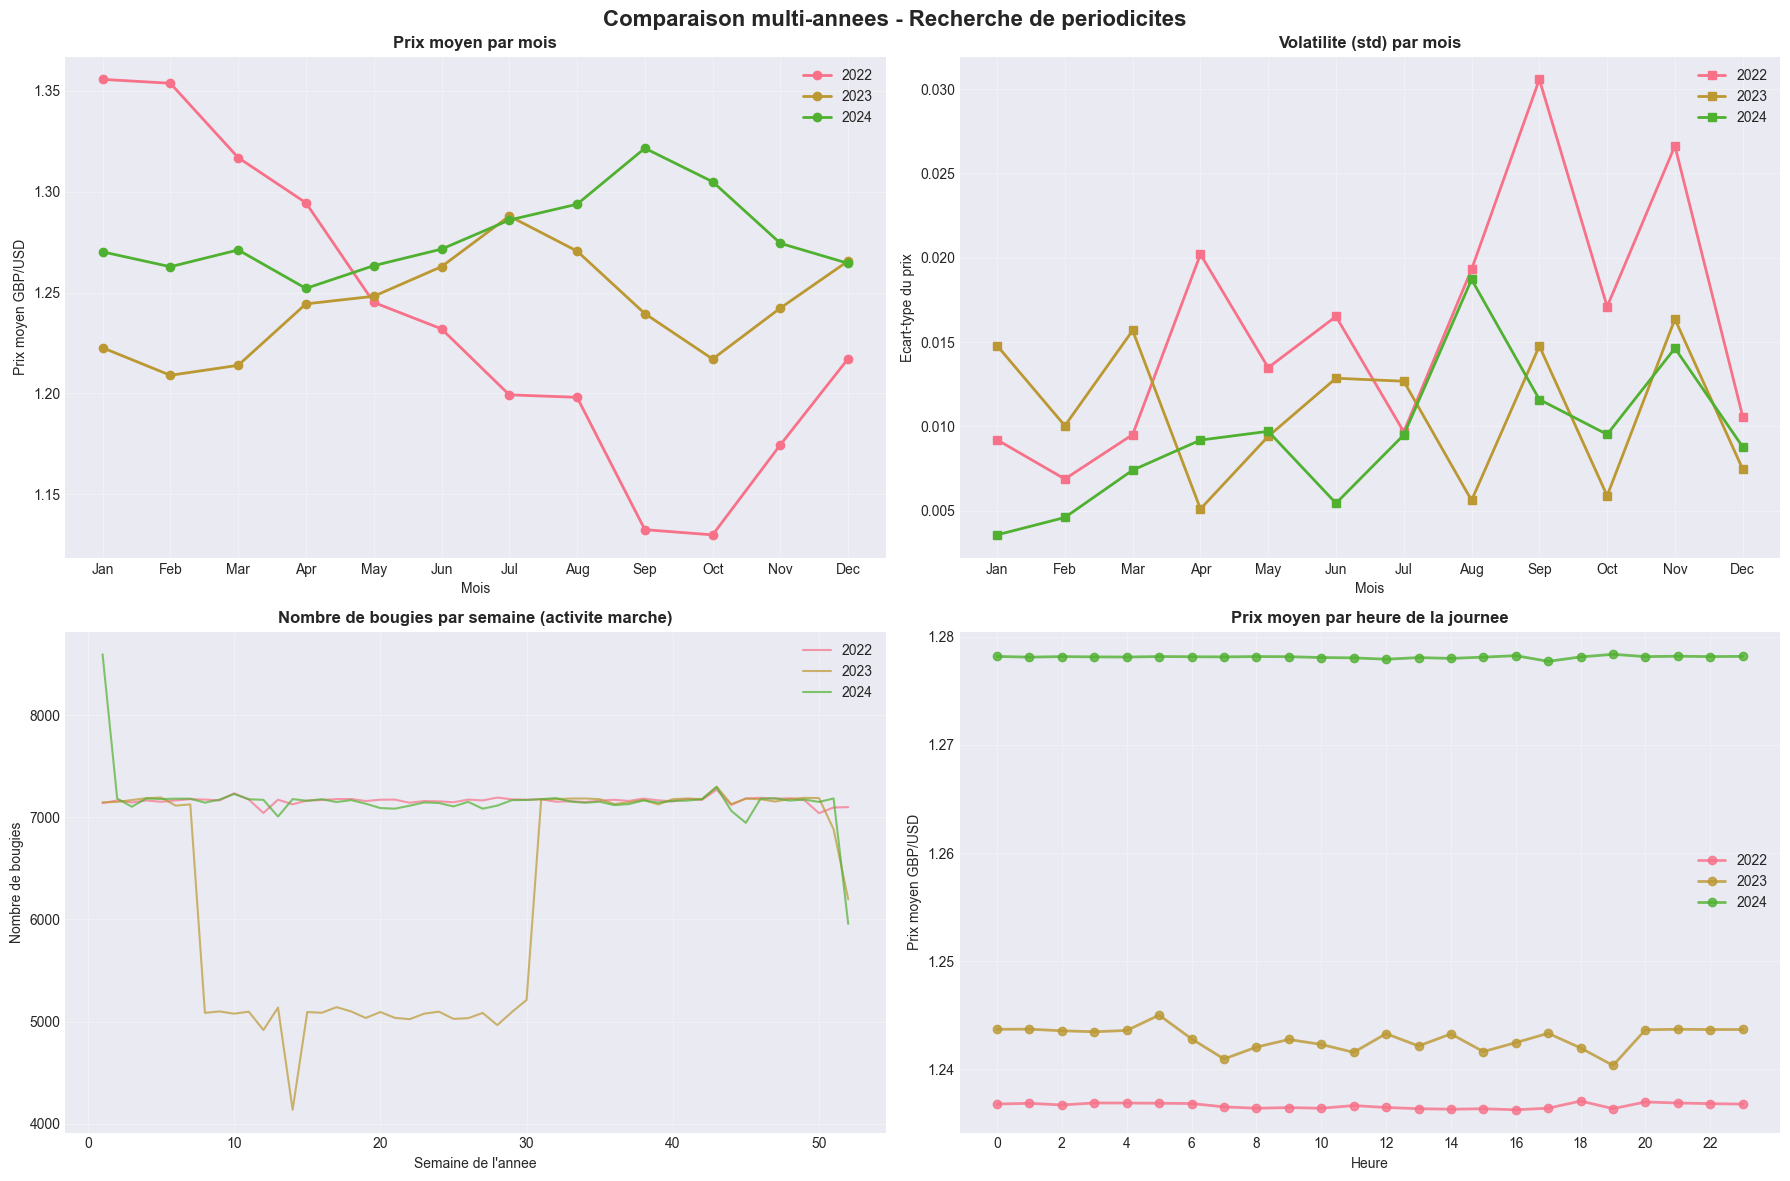


ANALYSE DE PERIODICITE

2022:
  Prix moyen annuel: 1.23663
  Volatilite annuelle: 0.07617
  Mois le plus volatil: 9
  Mois le moins volatil: 2
  Heure la plus active: 2h (15,600 bougies)
  Heure la moins active: 17h (14,247 bougies)

2023:
  Prix moyen annuel: 1.24295
  Volatilite annuelle: 0.02620
  Mois le plus volatil: 11
  Mois le moins volatil: 4
  Heure la plus active: 0h (15,524 bougies)
  Heure la moins active: 17h (11,173 bougies)

2024:
  Prix moyen annuel: 1.27813
  Volatilite annuelle: 0.02174
  Mois le plus volatil: 8
  Mois le moins volatil: 1
  Heure la plus active: 20h (15,612 bougies)
  Heure la moins active: 17h (14,979 bougies)


In [13]:
def compare_years_periodicity(df_2022, df_2023, df_2024):
    """Compare les 3 annees pour identifier des periodicites"""
    
    # Preparer les dataframes
    dfs = []
    for year, df in [(2022, df_2022), (2023, df_2023), (2024, df_2024)]:
        df_temp = df.copy()
        if 'timestamp' not in df_temp.columns:
            df_temp['timestamp'] = pd.to_datetime(df_temp['date'] + ' ' + df_temp['time'])
        df_temp['year'] = year
        df_temp['month'] = df_temp['timestamp'].dt.month
        df_temp['week'] = df_temp['timestamp'].dt.isocalendar().week
        df_temp['day_of_year'] = df_temp['timestamp'].dt.dayofyear
        df_temp['hour'] = df_temp['timestamp'].dt.hour
        dfs.append(df_temp)
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    fig.suptitle('Comparaison multi-annees - Recherche de periodicites', fontsize=16, fontweight='bold')
    
    # 1. Prix moyen par mois
    ax = axes[0, 0]
    for year, df_temp in zip([2022, 2023, 2024], dfs):
        monthly = df_temp.groupby('month')['close'].mean()
        ax.plot(monthly.index, monthly.values, marker='o', linewidth=2, label=str(year))
    
    ax.set_title('Prix moyen par mois', fontweight='bold', fontsize=12)
    ax.set_xlabel('Mois')
    ax.set_ylabel('Prix moyen GBP/USD')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.legend()
    ax.grid(alpha=0.3)
    
    # 2. Volatilite (std) par mois
    ax = axes[0, 1]
    for year, df_temp in zip([2022, 2023, 2024], dfs):
        monthly_std = df_temp.groupby('month')['close'].std()
        ax.plot(monthly_std.index, monthly_std.values, marker='s', linewidth=2, label=str(year))
    
    ax.set_title('Volatilite (std) par mois', fontweight='bold', fontsize=12)
    ax.set_xlabel('Mois')
    ax.set_ylabel('Ecart-type du prix')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.legend()
    ax.grid(alpha=0.3)
    
    # 3. Nombre de bougies par semaine de l'annee
    ax = axes[1, 0]
    for year, df_temp in zip([2022, 2023, 2024], dfs):
        weekly_count = df_temp.groupby('week').size()
        ax.plot(weekly_count.index, weekly_count.values, linewidth=1.5, alpha=0.7, label=str(year))
    
    ax.set_title('Nombre de bougies par semaine (activite marche)', fontweight='bold', fontsize=12)
    ax.set_xlabel('Semaine de l\'annee')
    ax.set_ylabel('Nombre de bougies')
    ax.legend()
    ax.grid(alpha=0.3)
    
    # 4. Prix moyen par heure de la journee
    ax = axes[1, 1]
    for year, df_temp in zip([2022, 2023, 2024], dfs):
        hourly = df_temp.groupby('hour')['close'].mean()
        ax.plot(hourly.index, hourly.values, marker='o', linewidth=2, label=str(year), alpha=0.8)
    
    ax.set_title('Prix moyen par heure de la journee', fontweight='bold', fontsize=12)
    ax.set_xlabel('Heure')
    ax.set_ylabel('Prix moyen GBP/USD')
    ax.set_xticks(range(0, 24, 2))
    ax.legend()
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Analyse statistique
    print("\n" + "="*60)
    print("ANALYSE DE PERIODICITE")
    print("="*60)
    
    for year, df_temp in zip([2022, 2023, 2024], dfs):
        print(f"\n{year}:")
        print(f"  Prix moyen annuel: {df_temp['close'].mean():.5f}")
        print(f"  Volatilite annuelle: {df_temp['close'].std():.5f}")
        print(f"  Mois le plus volatil: {df_temp.groupby('month')['close'].std().idxmax()}")
        print(f"  Mois le moins volatil: {df_temp.groupby('month')['close'].std().idxmin()}")
        
        # Heure la plus active
        hourly_count = df_temp.groupby('hour').size()
        print(f"  Heure la plus active: {hourly_count.idxmax()}h ({hourly_count.max():,} bougies)")
        print(f"  Heure la moins active: {hourly_count.idxmin()}h ({hourly_count.min():,} bougies)")

# Executer la comparaison
compare_years_periodicity(df_2022, df_2023, df_2024)

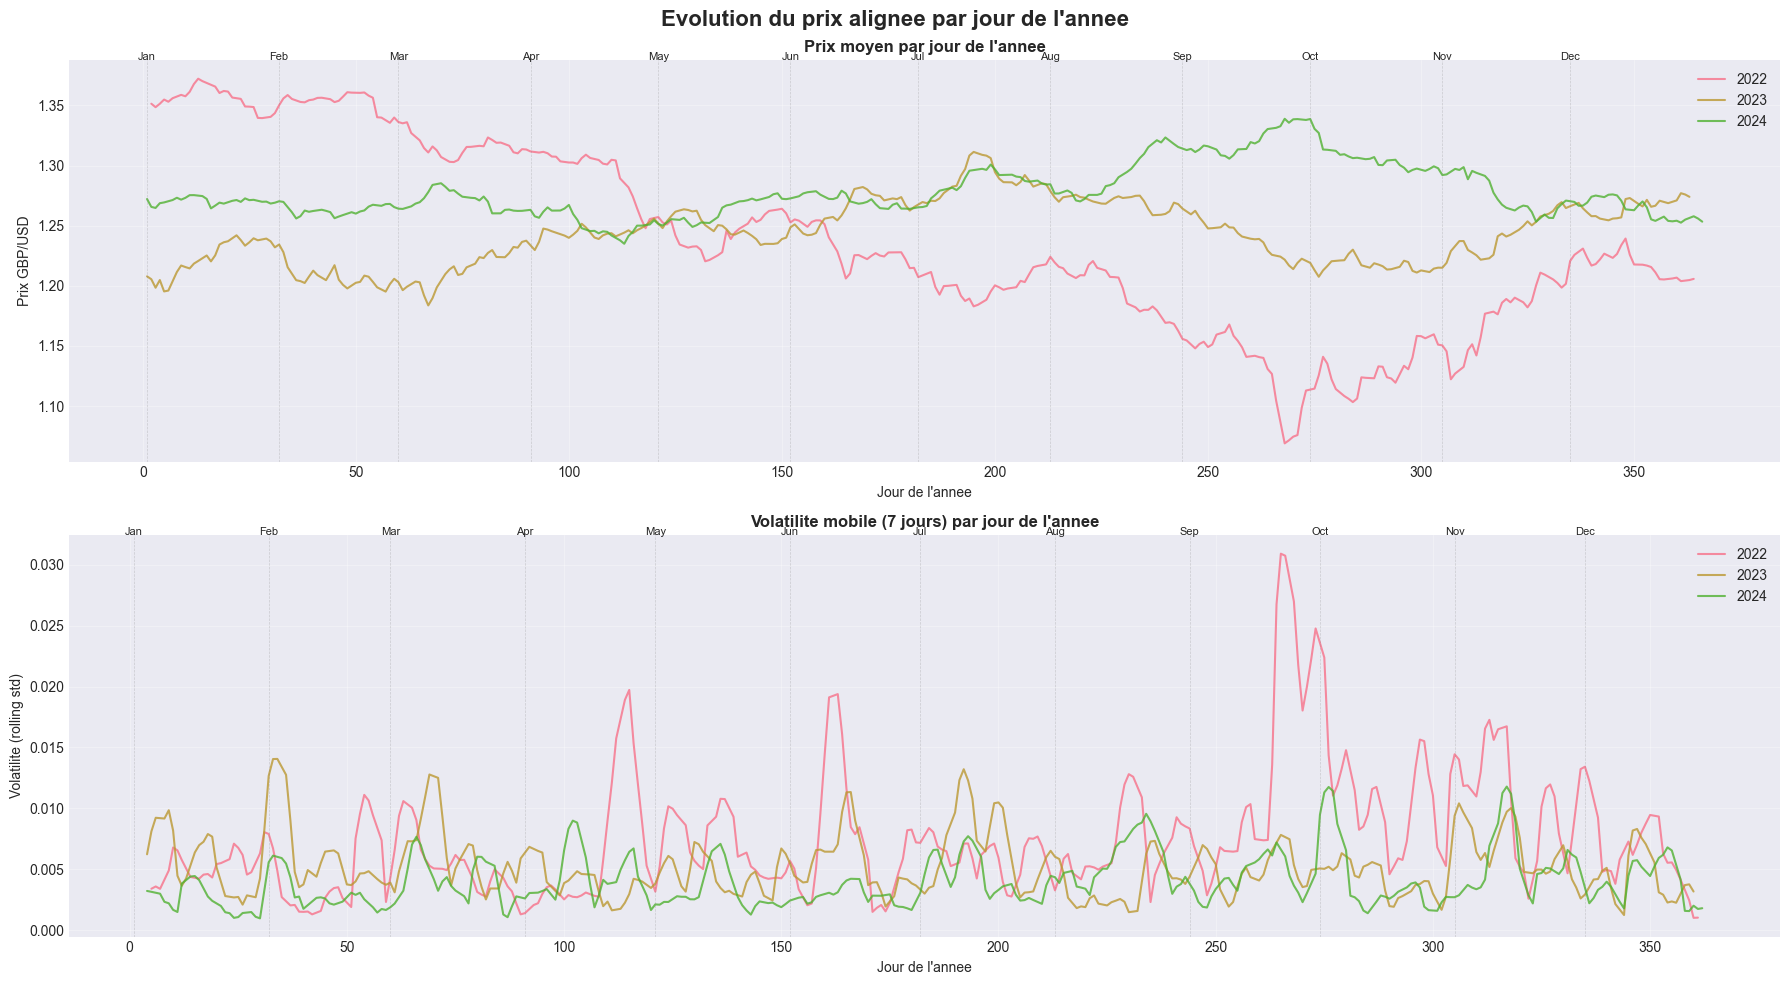


ANALYSE DE SAISONNALITE

Correlation 2022 vs 2023: -0.3399

Correlation 2022 vs 2024: -0.6924

Correlation 2023 vs 2024: -0.0332


In [14]:
def plot_aligned_price_evolution(df_2022, df_2023, df_2024):
    """Compare l'evolution du prix alignee sur le jour de l'annee"""
    
    fig, axes = plt.subplots(2, 1, figsize=(18, 10))
    fig.suptitle('Evolution du prix alignee par jour de l\'annee', fontsize=16, fontweight='bold')
    
    # Preparer les donnees
    dfs_processed = []
    for year, df in [(2022, df_2022), (2023, df_2023), (2024, df_2024)]:
        df_temp = df.copy()
        if 'timestamp' not in df_temp.columns:
            df_temp['timestamp'] = pd.to_datetime(df_temp['date'] + ' ' + df_temp['time'])
        df_temp['day_of_year'] = df_temp['timestamp'].dt.dayofyear
        df_temp['year'] = year
        dfs_processed.append(df_temp)
    
    # 1. Prix moyen par jour de l'annee
    ax = axes[0]
    for year, df_temp in zip([2022, 2023, 2024], dfs_processed):
        daily_mean = df_temp.groupby('day_of_year')['close'].mean()
        ax.plot(daily_mean.index, daily_mean.values, linewidth=1.5, label=str(year), alpha=0.8)
    
    ax.set_title('Prix moyen par jour de l\'annee', fontweight='bold', fontsize=12)
    ax.set_xlabel('Jour de l\'annee')
    ax.set_ylabel('Prix GBP/USD')
    ax.legend()
    ax.grid(alpha=0.3)
    
    # Ajouter des lignes verticales pour les mois
    month_days = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for day, name in zip(month_days, month_names):
        ax.axvline(day, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
        ax.text(day, ax.get_ylim()[1], name, fontsize=8, ha='center')
    
    # 2. Volatilite (rolling std 7 jours) par jour
    ax = axes[1]
    for year, df_temp in zip([2022, 2023, 2024], dfs_processed):
        daily_mean = df_temp.groupby('day_of_year')['close'].mean()
        rolling_std = daily_mean.rolling(window=7, center=True).std()
        ax.plot(rolling_std.index, rolling_std.values, linewidth=1.5, label=str(year), alpha=0.8)
    
    ax.set_title('Volatilite mobile (7 jours) par jour de l\'annee', fontweight='bold', fontsize=12)
    ax.set_xlabel('Jour de l\'annee')
    ax.set_ylabel('Volatilite (rolling std)')
    ax.legend()
    ax.grid(alpha=0.3)
    
    # Lignes verticales mois
    for day, name in zip(month_days, month_names):
        ax.axvline(day, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
        ax.text(day, ax.get_ylim()[1], name, fontsize=8, ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques sur la saisonnalite
    print("\n" + "="*60)
    print("ANALYSE DE SAISONNALITE")
    print("="*60)
    
    # Correlation entre annees
    for i, year1 in enumerate([2022, 2023, 2024]):
        for year2 in [2022, 2023, 2024][i+1:]:
            df1 = dfs_processed[i].groupby('day_of_year')['close'].mean()
            df2 = dfs_processed[[2022, 2023, 2024].index(year2)].groupby('day_of_year')['close'].mean()
            
            # Aligner sur les jours communs
            common_days = df1.index.intersection(df2.index)
            corr = df1.loc[common_days].corr(df2.loc[common_days])
            
            print(f"\nCorrelation {year1} vs {year2}: {corr:.4f}")

# Executer
plot_aligned_price_evolution(df_2022, df_2023, df_2024)